<a href="https://colab.research.google.com/github/jholliday55/jholliday-ADVDS/blob/main/Project7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive 
import cv2
import glob
from google.colab import drive
import numpy as np

drive.mount('/content/drive')

!ls /content/drive/
!ls -l /content/drive/MyDrive/facesDB
base_dir = '/content/drive/MyDrive/facesDB'

data = []
labels = []

for dirname, _, filenames in os.walk('/content/drive/MyDrive/facesDB'):
    for filename in filenames:
      if cv2.imread(os.path.join(dirname, filename)) is None:
        continue
      else:
        image = cv2.imread(os.path.join(dirname, filename))
        if image.all() != None:
          # image = image / 255
          label = os.path.join(dirname, filename).split(os.path.sep)[-1].split(".")[0]
          data.append(image)
          labels.append(label)

Mounted at /content/drive
MyDrive  Shareddrives
total 160
drwx------ 2 root root 4096 Mar  8 15:22 S1
drwx------ 2 root root 4096 Mar  8 15:22 S10
drwx------ 2 root root 4096 Mar  8 15:22 S11
drwx------ 2 root root 4096 Mar  8 15:22 S12
drwx------ 2 root root 4096 Mar  8 15:22 S13
drwx------ 2 root root 4096 Mar  8 15:22 S14
drwx------ 2 root root 4096 Mar  8 15:22 S15
drwx------ 2 root root 4096 Mar  8 15:22 S16
drwx------ 2 root root 4096 Mar  8 15:22 S17
drwx------ 2 root root 4096 Mar  8 15:22 S18
drwx------ 2 root root 4096 Mar  8 15:22 S19
drwx------ 2 root root 4096 Mar  8 15:22 S2
drwx------ 2 root root 4096 Mar  8 15:22 S20
drwx------ 2 root root 4096 Mar  8 15:22 S21
drwx------ 2 root root 4096 Mar  8 15:22 S22
drwx------ 2 root root 4096 Mar  8 15:22 S23
drwx------ 2 root root 4096 Mar  8 15:22 S24
drwx------ 2 root root 4096 Mar  8 15:22 S25
drwx------ 2 root root 4096 Mar  8 15:22 S26
drwx------ 2 root root 4096 Mar  8 15:22 S27
drwx------ 2 root root 4096 Mar  8 15:22 S28

In [2]:
# labels = list()

# for dirname, _, filenames in os.walk('/content/drive/MyDrive/facesDB'):
#   labels.append(dirname)

# print(labels)


0


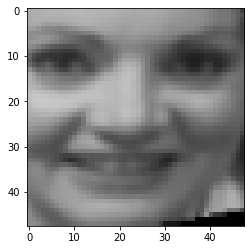

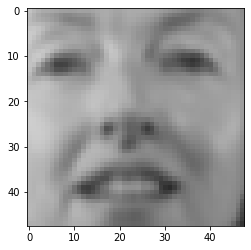

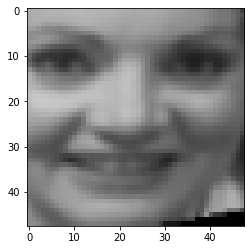

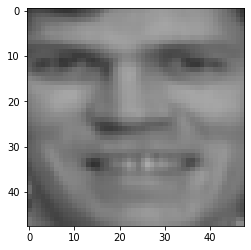

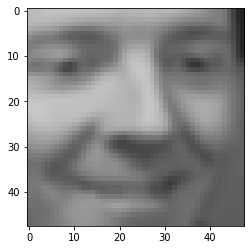

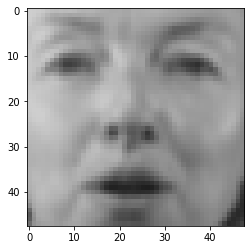

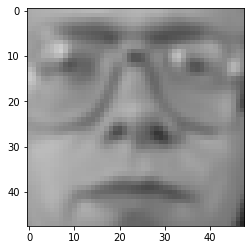

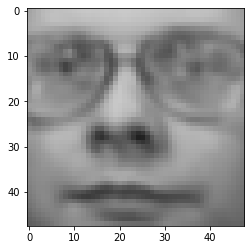

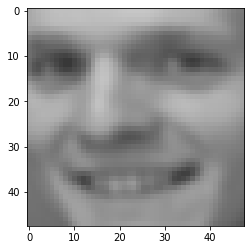

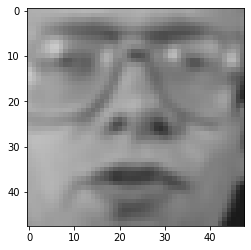

In [3]:
import matplotlib.pyplot as plt
from random import randrange
print(randrange(10))
for x in range(0, 10):
  plt.imshow(data[randrange(100)])
  plt.show()

In [4]:
from tensorflow.keras.utils import to_categorical
def load_dataset():
  train_images = np.asarray(data)

  trainY = np.asarray(labels)
  testY = np.asarray(labels)

  trainY = to_categorical(labels)
  testY = to_categorical(labels)

  trainX = train_images
  testX = train_images

  trainY = trainY.reshape((440, 10))
  testY = testY.reshape((440, 10))

  trainX = train_images.reshape((1200, 48, 48, 1))
  testX = train_images.reshape((1200, 48, 48, 1))

  trainX = trainX.astype('float32') / 255
  testX = trainX.astype('float32') / 255

  return trainX, trainY, testX, testY

In [5]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD

def create_compile_model_1():

  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(48, 48, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 
  return model

In [6]:
def evaluate_model(model, dataX, dataY, n_folds):

  scores, histories = list(), list()
 
  kfold = KFold(n_folds, shuffle=True, random_state=1)
 
  for train_ix, test_ix in kfold.split(dataX):
    print(dataY)
    print(train_ix)
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    print(trainX.shape)
    print(trainY.shape)
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
  
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('CV Fold accuracy:  %.3f' % (acc * 100.0))
  
    scores.append(acc)
    histories.append(history)
    print('hit')

  
  return scores, histories

In [7]:
def summarize_learning(histories):

  for i in range(len(histories)):
		
    pyplot.subplot(2, 1, 1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		
    pyplot.subplot(2, 1, 2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='red', label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='green', label='test')
  
    pyplot.show()

In [8]:
def summarize_performance(scores):

	# print summary
	print('Model Accuracy: mean=%.3f std=%.3f, folds=%d' % (mean(scores)*100, std(scores)*100, len(scores)))

In [9]:
def process(model, num_folds):

  trainX, trainY, testX, testY = load_dataset()
  print(model.summary)
  scores, histories = evaluate_model(model, trainX, trainY, num_folds)
 
  summarize_learning(histories)
 
  summarize_performance(scores)

In [10]:
num_folds = 2
trainX, trainY, testX, testY = load_dataset()
model1 = create_compile_model_1()
model1.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)

# evaluate the model
process(model1, num_folds)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


ValueError: ignored